# Train on Simulated Data

Train a simple classifier accessing the simulated data tfrecord's in S3 towards enabling training and experimentation on Colab

In [73]:
import os
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()

In [74]:
metadata = requests.get("https://s3.nautilus.optiputer.net/braingeneers/simulated/metadata.json").json()
metadata.keys()

dict_keys(['image_height', 'description', 'labels', 'num_test_examples', 'num_train_examples', 'image_width'])

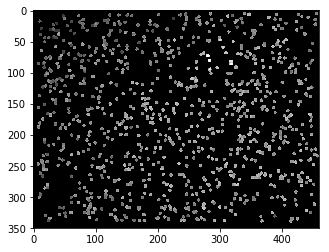

In [89]:
def parse_one_example(example):
    example = tf.parse_single_example(example, features = {
        "example": tf.FixedLenFeature([], tf.string),
        "label": tf.FixedLenFeature([], tf.int64)
    })
    return example["example"], tf.one_hot(example["label"], len(metadata["labels"]))

training_dataset = tf.data.TFRecordDataset(["s3://braingeneers/simulated/mltest-cropped-test.tfrecord"])


# Extract and display first image
# https://www.tensorflow.org/api_guides/python/image#Encoding_and_Decoding
example, label = parse_one_example(training_dataset.make_one_shot_iterator().get_next())
image = tf.image.decode_image(example)

assert metadata["image_width"] == image.shape[1].value
assert metadata["image_height"] == image.shape[0].value

plt.imshow(image.numpy().reshape(image.shape[0], image.shape[1]), cmap='gray')